In [1]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install openpyxl

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp312-cp312-macosx_10_13_universal2.whl.metadata (164 kB)
  Using cached kiwisolver-1.4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import scipy.optimize as opt
from pandas.plotting import parallel_coordinates

In [3]:
df = pd.read_excel('dataset.xlsx')
df['industry investment, billions US$'] = df['foreign direct investment, US$ average'] * 1e-9
df['exports average, billions US$'] *= 1e-9
df = df[['clearance investments average', 'sq km of land cleared average', 'exports average, billions US$', 'Employment %, average', 'industry investment, billions US$']]
df

,clearance investments average,sq km of land cleared average,"exports average, billions US$","Employment %, average","industry investment, billions US$"
0,2.631875e+06,2.871250,16.948209,54.318407,1.433715
1,2.884062e+06,3.017500,19.119612,54.407156,1.159808
2,4.501250e+06,3.506250,17.894959,54.360531,1.175357
3,6.602188e+06,9.422812,19.129833,54.651219,1.129326
4,6.933750e+06,6.983125,22.303667,54.807437,1.563016
5,5.309062e+06,10.075000,28.418760,54.996656,1.974133
6,8.464062e+06,9.758750,33.158264,55.277906,2.368422
7,1.221969e+07,16.456875,39.234475,55.814813,3.392137
8,1.079531e+07,14.533750,47.175450,56.351656,3.825696
9,4.218750e+04,0.046250,55.206732,56.475469,4.013000


#Modelling

In [4]:
ONE_train_x, ONE_test_x, ONE_train_y, ONE_test_y = train_test_split(df['clearance investments average'], df['sq km of land cleared average'], test_size=0.2, random_state=14)
TWO_train_x, TWO_test_x, TWO_train_y, TWO_test_y = train_test_split(df['industry investment, billions US$'], df['exports average, billions US$'],  test_size=0.2, random_state=25)
THREE_train_x, THREE_test_x, THREE_train_y, THREE_test_y = train_test_split(df['industry investment, billions US$'], df['Employment %, average'], test_size=0.2, random_state=12)

##Objective 1 - mine cleared area

In [5]:

lreg = LinearRegression()
lreg.fit(ONE_train_x.to_numpy().reshape(-1,1), ONE_train_y)
print('R2: ', r2_score(ONE_test_y, lreg.predict(ONE_test_x.to_numpy().reshape(-1,1))))
print('MSE:', mean_squared_error(ONE_test_y, lreg.predict(ONE_test_x.to_numpy().reshape(-1,1))))

R2:  0.8553546736660618
MSE: 6.923271739902489


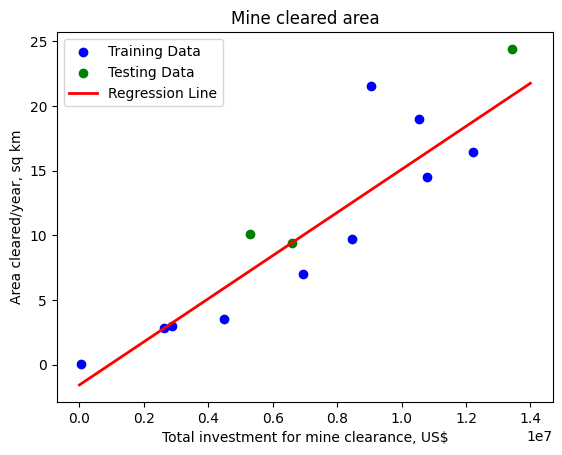

In [6]:

plt.scatter(ONE_train_x, ONE_train_y, color='blue', label='Training Data')

plt.scatter(ONE_test_x, ONE_test_y, color='green', label='Testing Data')
x_range = np.linspace(0, 1.4e7, 100000).reshape(-1, 1)
plt.plot(x_range, lreg.predict(x_range), color='red', linewidth=2, label='Regression Line')
plt.title('Mine cleared area')
plt.xlabel('Total investment for mine clearance, US$')
plt.ylabel('Area cleared/year, sq km')
plt.legend()
plt.show()

#Objective2 - expected exports


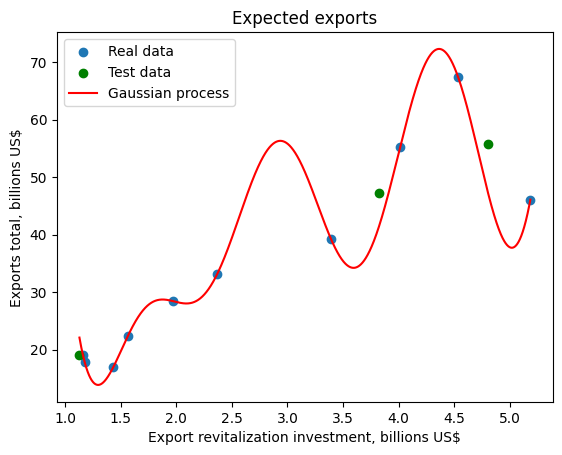

R2:  0.8455156309274501
MSE: 37.90887301121386


In [7]:
# worked fine without param tuning
gpr = GaussianProcessRegressor().fit(TWO_train_x.to_numpy().reshape(-1,1), TWO_train_y.to_numpy().reshape(-1,1))

x_range = np.linspace(df['industry investment, billions US$'].min(), df['industry investment, billions US$'].max(), 5000)
plt.scatter(TWO_train_x, TWO_train_y, label='Real data')
plt.scatter(TWO_test_x, TWO_test_y, label='Test data', color='green')
y_pred = gpr.predict(x_range.reshape(-1,1))
plt.plot(x_range, y_pred , color='red', label='Gaussian process')
plt.title('Expected exports')
plt.xlabel('Export revitalization investment, billions US$')
plt.ylabel('Exports total, billions US$')
plt.legend()
plt.show()

print('R2: ', r2_score(TWO_test_y, gpr.predict(TWO_test_x.to_numpy().reshape(-1,1))))
print('MSE:', mean_squared_error(TWO_test_y, gpr.predict(TWO_test_x.to_numpy().reshape(-1,1))))

#Objective 3 - population employment %

In [8]:
tr = RandomForestRegressor()
tr.fit(THREE_train_x.to_numpy().reshape(-1,1), THREE_train_y.to_numpy())

RandomForestRegressor()

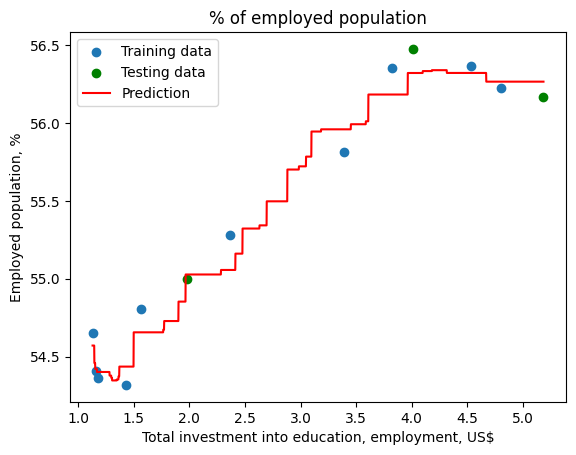

R2:  0.9711857042305895
MSE 0.011676594663004894


In [9]:
x_range = np.linspace(df['industry investment, billions US$'].min(), df['industry investment, billions US$'].max(), 5000)
y_pred = tr.predict(x_range.reshape(-1, 1))
plt.scatter(THREE_train_x, THREE_train_y, label='Training data')
plt.scatter(THREE_test_x, THREE_test_y, label='Testing data', color='green')
plt.plot(x_range, y_pred, color='red', label='Prediction')
plt.legend()
plt.title('% of employed population')
plt.xlabel('Total investment into education, employment, US$')
plt.ylabel('Employed population, %')
plt.show()
print('R2: ', r2_score(THREE_test_y, tr.predict(THREE_test_x.to_numpy().reshape(-1,1))))
print('MSE', mean_squared_error(THREE_test_y, tr.predict(THREE_test_x.to_numpy().reshape(-1,1))))

#Optimization itself

In [10]:
def evaluate_models(x):
  return np.array([lreg.predict([[x[0]]]), gpr.predict([[x[1]]]), tr.predict([[x[2]]])]).squeeze()



# [ 5.10193448 53.24272121 56.29913769]
test_evaluation_values = [5e6, 3.1, 4.0]
print(f'Obj. functions({test_evaluation_values}):', evaluate_models(test_evaluation_values))


# BOUNDS TO PREVENT EXTRAPOLATION
# By controlling these bounds we can tell the algorithm our "preferences"
bounds = [( df['clearance investments average'].min(), df['clearance investments average'].max()),
          (df['industry investment, billions US$'].min(), df['industry investment, billions US$'].max()),
          (df['industry investment, billions US$'].min(), df['industry investment, billions US$'].max())]

print('Argument bounds', bounds)

model_one_range = np.linspace(bounds[0][0], bounds[0][1], 5000).reshape(-1, 1)
x_range = np.linspace(bounds[1][0], bounds[1][1], 5000).reshape(-1, 1)

# Maximums between model-predicted and existed data
# Maximize objectives
z_ideal = np.array([
    np.max([df['sq km of land cleared average'].max(), lreg.predict(model_one_range).max()]),
    np.max([df['exports average, billions US$'].max(), gpr.predict(x_range).max()]),
    np.max([df['Employment %, average'].max(), tr.predict(x_range).max()])])
print('Ideal objective vector:', z_ideal)


# Global criterion L2 scalarization
def global_criterion_l2(x, ideal):
  return np.linalg.norm(ideal - evaluate_models(x), ord=2)

print('Test scalarization evaluation: ',global_criterion_l2(test_evaluation_values, z_ideal))


def total_money(x):
  return round(x[0] + x[1] * 1e9 + x[2] * 1e9)

N = 6e9
def constraint(x):
  return N - total_money(x)


Obj. functions([5000000.0, 3.1, 4.0]): [ 6.76752986 53.24272117 56.32095236]
Argument bounds [(np.float64(42187.5), np.float64(13432490.65625)), (np.float64(1.1293264176256854), np.float64(5.184881663170051)), (np.float64(1.1293264176256854), np.float64(5.184881663170051))]
Ideal objective vector: [24.41410274 72.33123683 56.47546864]
Test scalarization evaluation:  25.996092780528034


In [11]:
pareto = []


for i in range(100):
  x_initial = [np.random.uniform(low=b[0], high=b[1]) for b in bounds]

  result = opt.minimize(
    global_criterion_l2,
    x0=x_initial,
    args=(z_ideal,),
    constraints={'type': 'ineq', 'fun': constraint})
  y = evaluate_models(result.x)
  if result.success and np.all(y > 0) and np.all(result.x > 0):
    print(f'x:{result.x}, Total money: {total_money(result.x)}, y: {y}, Scalarized value: {global_criterion_l2(result.x, z_ideal):9f}')
    pareto.append(y)


x:[1.18132345e+07 9.06218555e-01 2.45414482e+00], Total money: 3372176610, y: [18.11562181 72.33120535 55.16119244], Scalarized value:  6.434142
x:[8.79693413e+06 4.36454625e+00 2.25884183e-01], Total money: 4599227369, y: [13.0916858  72.33114392 54.57118637], Scalarized value: 11.481438
x:[4.49827452e+06 4.35356218e+00 1.50195767e+00], Total money: 5860018125, y: [ 5.93185822 72.31315957 54.65609245], Scalarized value: 18.571586
x:[1.50888739e+06 2.93595340e+00 1.26253201e+00], Total money: 4199994298, y: [ 0.95274883 56.3358986  54.40154577], Scalarized value: 28.470812
x:[1.17518908e+07 2.93603429e+00 2.77568626e+00], Total money: 5723472441, y: [18.01344804 56.33589946 55.49712695], Scalarized value: 17.256197
x:[6.94719050e+06 4.36875214e+00 1.62076916e+00], Total money: 5996468488, y: [10.01076136 72.3270253  54.65609245], Scalarized value: 14.517796
x:[1.22026311e+07 4.35531256e+00 1.63226125e+00], Total money: 5999776438, y: [18.76419898 72.31880567 54.65609245], Scalarized va

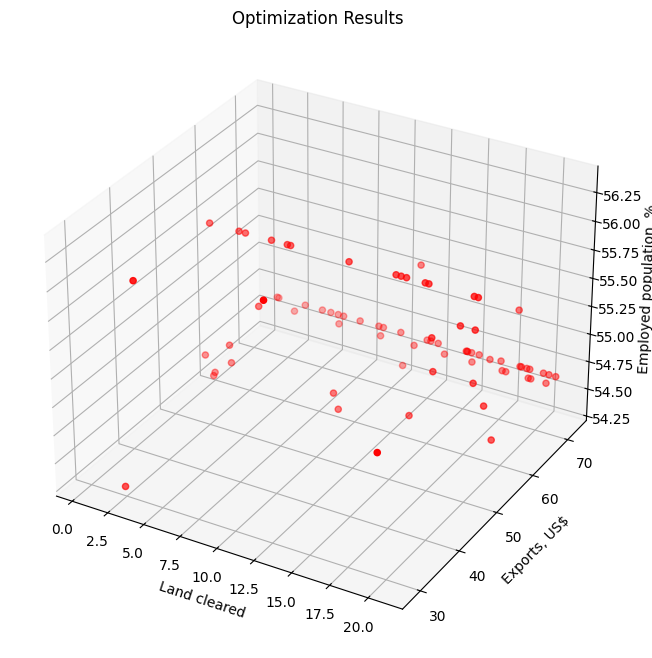

In [12]:
top = sorted(pareto, key=lambda x: np.linalg.norm(z_ideal - x, ord=2))


objone = []
objtwo = []
objthree = []
for elem in top:
  objone.append(elem[0])
  objtwo.append(elem[1])
  objthree.append(elem[2])



fig = plt.figure(figsize=(25, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(objone, objtwo, objthree, color='r', marker='o')


ax.set_xlabel('Land cleared')
ax.set_ylabel('Exports, US$')
ax.set_zlabel('Employed population, %')
plt.title('Optimization Results')


plt.show()
